In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#Read Data from adult.data file

columns = ['Age', 'WorkClass', 'FNLWGT', 'Education', 'EducationNum',
           'MaritalStatus','Occupation','Relationship','Race','Sex', 
           'CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry', 'Income']

train_data = pd.read_csv('Dataset/adult.data', sep=', ', names=columns, engine='python')
test_data = pd.read_csv('Dataset/adult.test', sep=', ', names=columns, engine='python', skiprows = 1)

In [20]:
train_data.sample(10)

,Age,WorkClass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
28110,34,Self-emp-inc,157466,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,United-States,<=50K
32316,23,Federal-gov,173851,HS-grad,9,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,8,United-States,<=50K
29397,50,?,204577,Bachelors,13,Married-civ-spouse,?,Husband,Black,Male,0,1902,60,United-States,>50K
14021,29,Private,37933,Bachelors,13,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,<=50K
18434,58,Private,116901,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,25,United-States,<=50K
15160,53,Private,135840,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,>50K
16997,20,Private,157894,Some-college,10,Never-married,Other-service,Own-child,Black,Male,0,0,20,United-States,<=50K
15388,35,Private,188888,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,>50K
25036,65,Private,153522,HS-grad,9,Widowed,Other-service,Unmarried,White,Female,0,0,17,United-States,<=50K
16902,52,Private,137428,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,45,United-States,<=50K


In [21]:
test_data.sample(10)

,Age,WorkClass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
5076,27,Private,79661,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,4386,0,40,United-States,>50K.
14496,29,Private,178610,Some-college,10,Divorced,Other-service,Unmarried,White,Female,0,0,21,United-States,<=50K.
1508,27,Private,409246,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,>50K.
7057,38,Private,163204,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1740,40,United-States,<=50K.
9359,18,Private,211273,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,19,United-States,<=50K.
11804,58,Private,147098,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,60,United-States,>50K.
8360,37,Private,237943,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,Poland,<=50K.
670,19,Private,181652,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,24,United-States,<=50K.
811,31,Private,289889,Assoc-voc,11,Never-married,Tech-support,Not-in-family,White,Male,0,0,40,United-States,<=50K.
13239,55,Private,173422,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K.


In [22]:
train_data.shape

(32561, 15)

In [23]:
test_data.shape

(16281, 15)

In [24]:
df = pd.concat([train_data, test_data])
df

,Age,WorkClass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [25]:
df['Income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [35]:
(df == '?').sum(axis = 0)

Age                 0
WorkClass        2799
FNLWGT              0
Education           0
EducationNum        0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry     857
Income              0
dtype: int64

In [38]:
duplicates = df.shape[0] - df.drop_duplicates().shape[0]
duplicates

29

In [51]:
def clean_data(data):
    #Some Income values have a dot at the end,
    #so removing them
    data['Income'] = data['Income'].str.rstrip('.')
        
    #Removing duplicates
    data = data.drop_duplicates()
    
    #Dropping rows where columns have '?'
    data = data[~(data[['WorkClass', 'Occupation', 'NativeCountry']] == '?').any(axis = 1)]
    
    #Dropping NaNs
    #data = data.dropna()
     
    return data

In [56]:
train_df = clean_data(train_data)
#(train_df == '?').sum(axis=0)

In [57]:
test_df = clean_data(test_data)
#(test_df == '?').sum(axis=0)

In [58]:
work_df = pd.concat([train_df, test_df])
work_df.shape

(45194, 15)

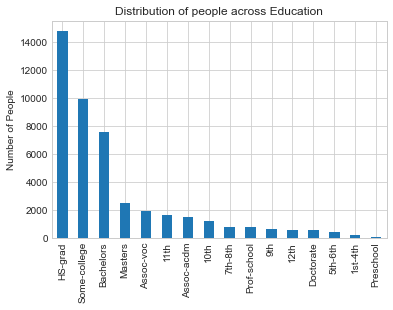

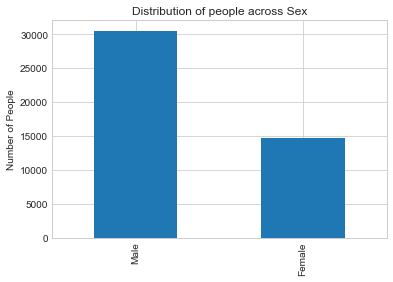

In [63]:
cols = work_df[['Education', 'Sex']]
for c in cols:
    plt.title('Distribution of people across {}'.format(c))
    work_df[c].value_counts().plot(kind = 'bar')
    plt.ylabel('Number of People')
    plt.show()

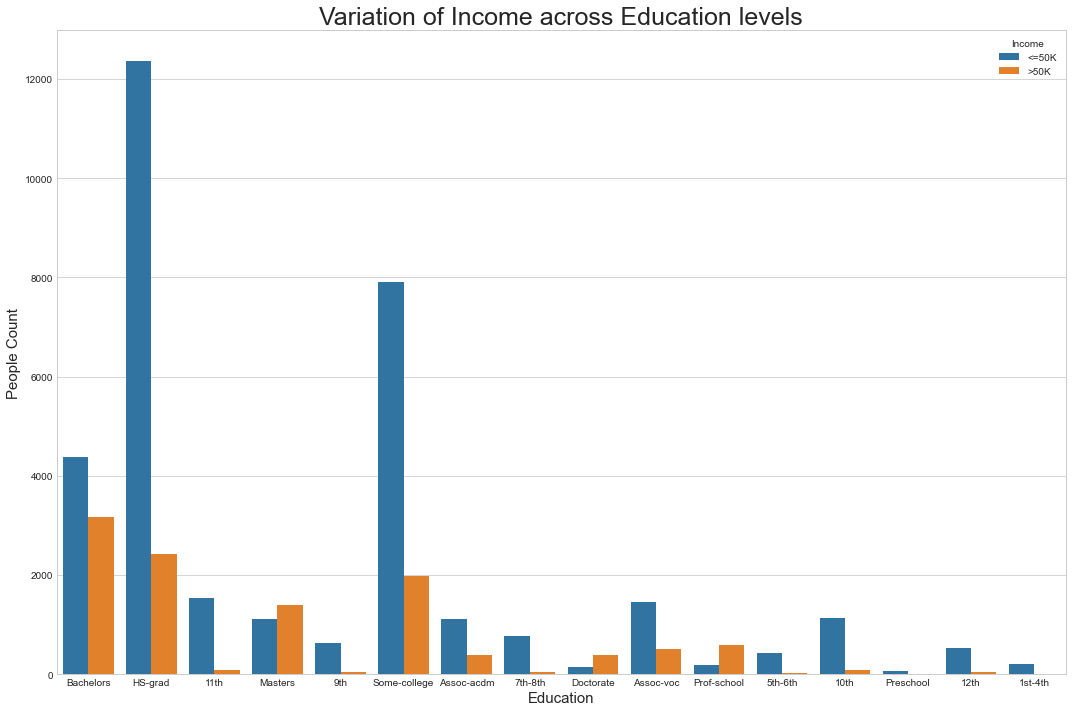

In [81]:
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (15, 10))
sns.countplot(x = 'Education', hue = 'Income', data = work_df)
plt.title('Variation of Income across Education levels', size = 25)
plt.xlabel('Education', size = 15)
plt.ylabel('People Count', size = 15)
plt.tight_layout()
plt.show()

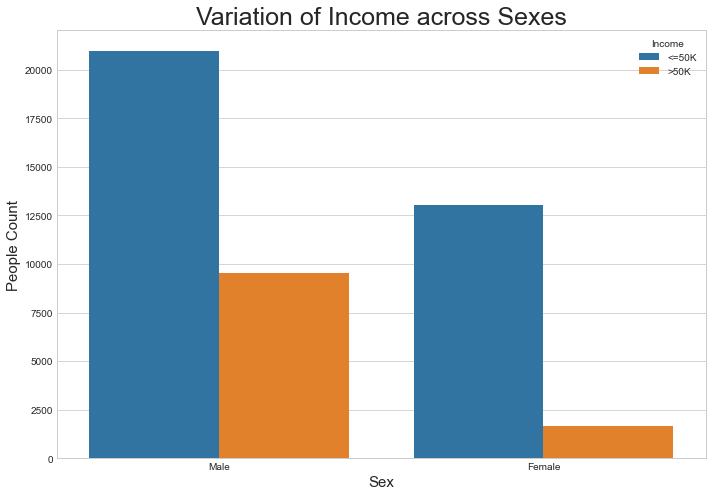

In [82]:
plt.figure(figsize = (10, 7))
sns.countplot(x = 'Sex', hue = 'Income', data = work_df)
plt.title('Variation of Income across Sexes', size = 25)
plt.xlabel('Sex', size = 15)
plt.ylabel('People Count', size = 15)
plt.tight_layout()
plt.show()